In [70]:
#--- Import Libraries ---
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import seaborn as sns
from wordcloud import WordCloud

In [80]:
#--- Read in the dataset ---
df = pd.read_csv('data/spam.csv')

#--- Inspect the data ---
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
3495,ham,Happy birthday... May u find ur prince charmin...,NaN,NaN,NaN
3496,ham,"Oh, the grand is having a bit of a party but i...",NaN,NaN,NaN
3497,ham,You said to me before i went back to bed that ...,NaN,NaN,NaN
3498,ham,I hope you arnt pissed off but id would really...,NaN,NaN,NaN


In [6]:
#--- Checking for total null values ---
null_values = df.isnull().sum()

#--- Inspect data ---
null_values

v1               0
v2               0
Unnamed: 2    3472
Unnamed: 3    3493
Unnamed: 4    3497
dtype: int64

In [7]:
#--- Drop unnecessary columns and rename relevant columns ---
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

#--- Inspect data ---
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
3495,ham,Happy birthday... May u find ur prince charmin...
3496,ham,"Oh, the grand is having a bit of a party but i..."
3497,ham,You said to me before i went back to bed that ...
3498,ham,I hope you arnt pissed off but id would really...


In [9]:
#--- Create a LabelEncoder Instance ---
enc = LabelEncoder()

#--- Apply Label Encoding to the Target Column ---
df['target'] = enc.fit_transform(df['target'])

#--- Inspect data ---
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
3495,0,Happy birthday... May u find ur prince charmin...
3496,0,"Oh, the grand is having a bit of a party but i..."
3497,0,You said to me before i went back to bed that ...
3498,0,I hope you arnt pissed off but id would really...


In [10]:
#--- Calculate the number of duplicates ---
duplicates = df.duplicated().sum()

#--- Inspect data ---
duplicates

198

In [11]:
#--- drop the duplicate rows --- 
df.drop_duplicates(inplace=True, keep='first')

#--- Inspect data ---
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
3495,0,Happy birthday... May u find ur prince charmin...
3496,0,"Oh, the grand is having a bit of a party but i..."
3497,0,You said to me before i went back to bed that ...
3498,0,I hope you arnt pissed off but id would really...


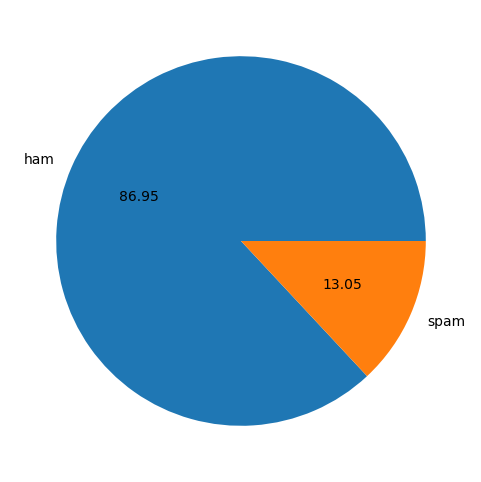

0    2871
1     431
Name: target, dtype: int64

In [14]:
#--- count the unique value in the target column ---
value = df['target'].value_counts() 

#--- Inspect data ---
plt.figure(figsize=(6, 6))  # Set the figure size for better visualization
plt.pie(value, labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()
value

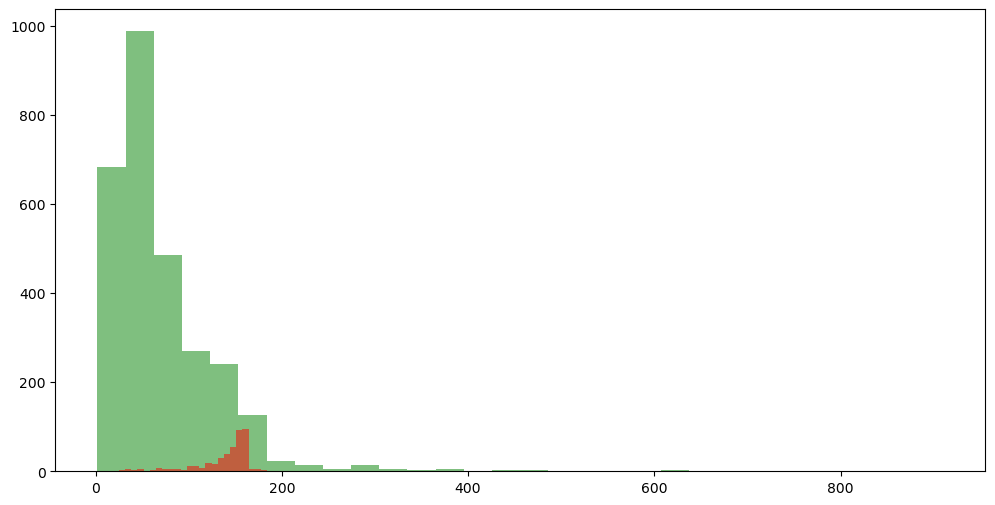

0    111
1     29
2    155
3     49
4     61
Name: num_char, dtype: int64

In [18]:
#--- create a dataframe column to find the length of each text in the text column         
df['num_char'] = df['text'].apply(len)

#--- Inspect data ---
plt.figure(figsize = (12, 6))
plt.hist(df[df['target'] == 0]['num_char'], color='green', alpha=0.5, label='Ham', bins=30)
plt.hist(df[df['target'] == 1]['num_char'], color='red', alpha=0.5, label='Spam', bins=30)
plt.show()
df['num_char'].head(5)

In [19]:
#--- download the punkt tokenizer from the nltk library for text tokenization ---
# import nltk
#--- nltk.download('punkt') --- 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raiha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

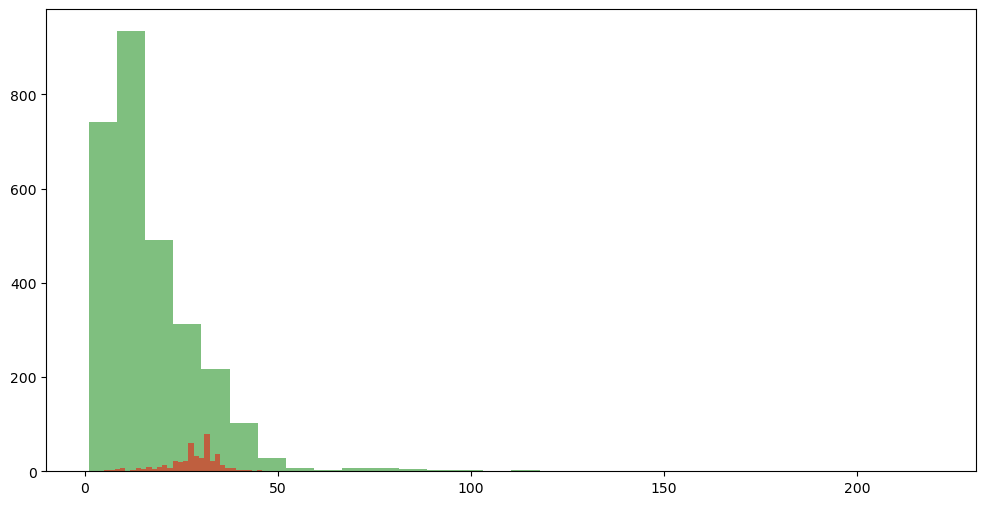

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#--- create a new dataframe to count number of words in entry of the text column
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)) if pd.notna(x) else 0)

#--- Inspect data ---
plt.figure(figsize = (12, 6))
plt.hist(df[df['target'] == 0]['num_words'], color='green', alpha=0.5, label='Ham', bins=30)
plt.hist(df[df['target'] == 1]['num_words'], color='red', alpha=0.5, label='Spam', bins=30)
plt.show()
df.head(5)


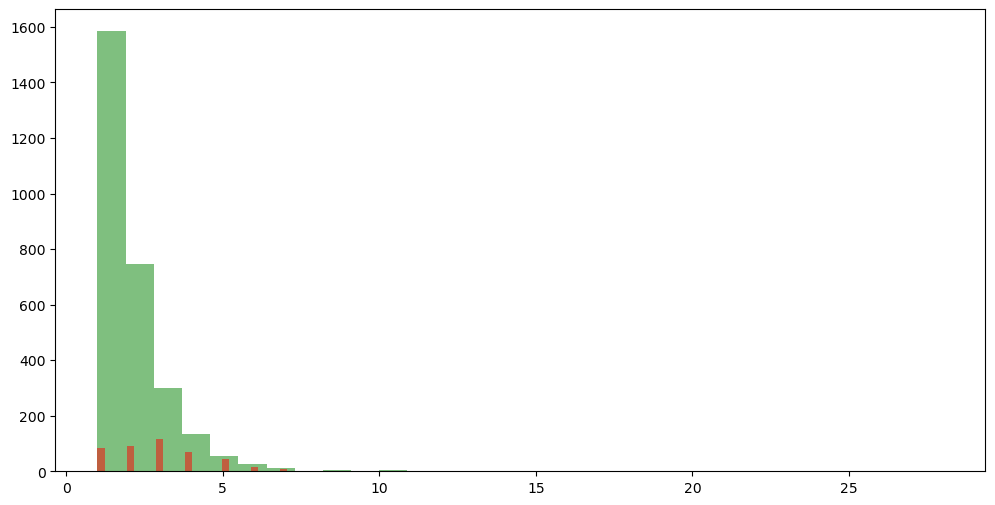

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
#--- create a dataframe column to count the number of sentences in each text entry ---
df['num_sent'] = df['text'].apply(lambda x: len(sent_tokenize(x)) if pd.notna(x) else 0)

#--- Inspect data ---
plt.figure(figsize = (12, 6))
plt.hist(df[df['target'] == 0]['num_sent'], color='green', alpha=0.5, label='Ham', bins=30)
plt.hist(df[df['target'] == 1]['num_sent'], color='red', alpha=0.5, label='Spam', bins=30)
plt.show()
df.head(5)

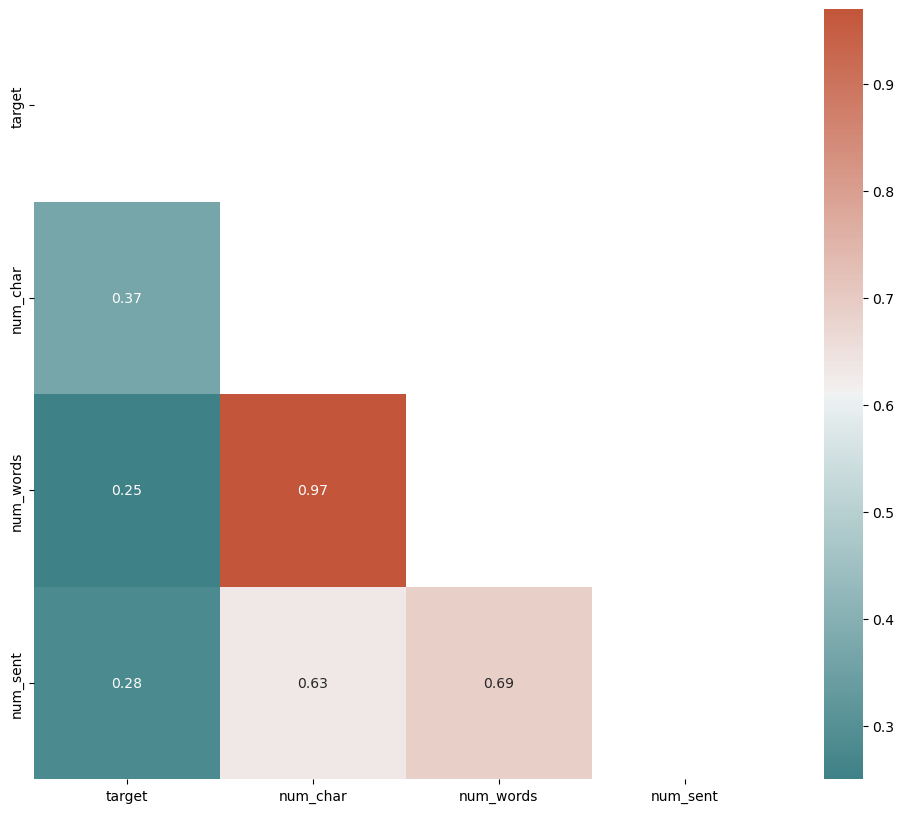

In [30]:
#--- find the coorelation matrix of the numerical columns of the dataframe ---
num_col = ['target', 'num_char', 'num_words', 'num_sent']
cor = df[num_col].corr().round(2)

#--- Inspect data ---
plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(cor, dtype=bool))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(cor, annot=True, mask=mask, cmap=cmap)
plt.show()


In [31]:
#--- download the stopwords list from the nltk library for stopwords 
# import nltk
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raiha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [36]:
from nltk.corpus import stopwords
import string
#--- importing the PorterStemmer from the nltk library for finding the stem of words ---
#--- Or removing the suffixes ---

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def text_preprocessing(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y.copy()
  y = []
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y.copy()
  y = []
  for i in text:
    y.append(ps.stem(i))

  return ' '.join(y)



df['transformed_text'] = df['text'].apply(text_preprocessing)

#--- Inspect data ---
df


,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
3495,0,Happy birthday... May u find ur prince charmin...,75,16,1,happi birthday may u find ur princ charm soon ...
3496,0,"Oh, the grand is having a bit of a party but i...",121,27,1,oh grand bit parti mention cover charg probabl...
3497,0,You said to me before i went back to bed that ...,75,18,1,said went back bed ca sleep anyth
3498,0,I hope you arnt pissed off but id would really...,95,19,2,hope arnt piss id would realli like see tomorr...


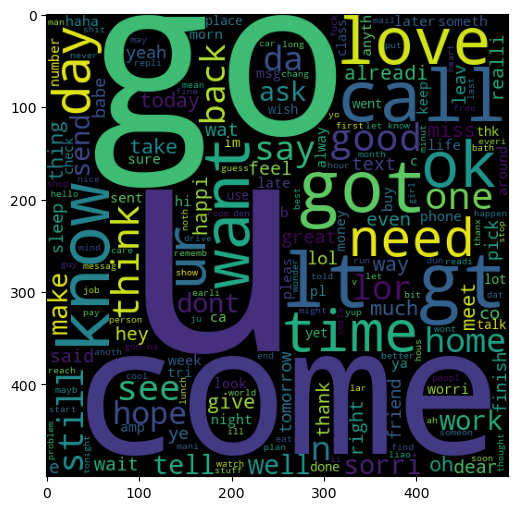

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent


In [41]:
#--- creating a dataframe by filtering rows in the df dataframe where target equal to 0 (representing non-spam message)
ham = df[df['target'] == 0]

#--- Inspect data ---
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
ham_wc = wc.generate(ham['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize = (12, 6))
plt.imshow(ham_wc)
plt.show()
ham.head(5)

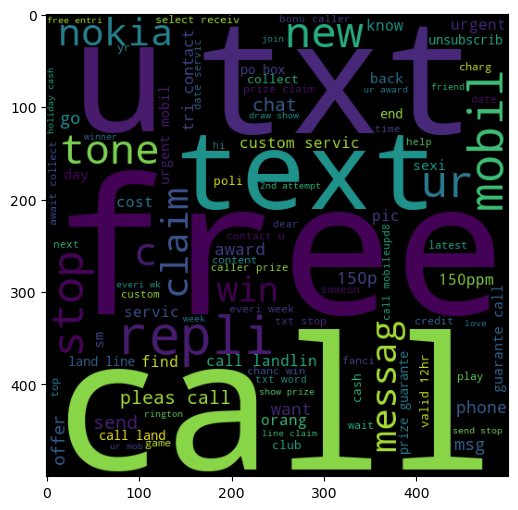

,target,text,num_char,num_words,num_sent,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...


In [45]:
# repeat the above steps for the spam messages 
spam = df[df['target'] == 1]

#--- Inspect data ---
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
spam_wc = wc.generate(spam['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize = (12, 6))
plt.imshow(spam_wc)
plt.show()
spam.head(5)

In [47]:
from collections import Counter

#--- Create a list 'ls' by extracting the 'transformed_text' --- 
#--- from the DataFrame 'df' for rows where the 'target' is equal to 1 ---
ls = df[df['target'] == 1]['transformed_text'].tolist()

# Initialize list to store individual words
words = []

for text in ls:
    if pd.notna(text):  # Check for missing values
        words.extend(text.split())  # Extend with split words

# count the 30 most common words by appearence        
count = Counter(words)
count = count.most_common(30)
count.sort(key = lambda x: x[1], reverse = True)

#--- Inspect data ---
count

[('call', 201),
 ('free', 130),
 ('2', 107),
 ('txt', 107),
 ('ur', 90),
 ('u', 89),
 ('text', 76),
 ('mobil', 70),
 ('4', 68),
 ('stop', 64),
 ('claim', 62),
 ('repli', 61),
 ('prize', 54),
 ('get', 52),
 ('servic', 47),
 ('tone', 45),
 ('nokia', 43),
 ('new', 41),
 ('urgent', 40),
 ('send', 38),
 ('award', 38),
 ('win', 37),
 ('week', 37),
 ('pleas', 36),
 ('contact', 36),
 ('phone', 36),
 ('cash', 34),
 ('messag', 30),
 ('c', 28),
 ('collect', 28)]

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

#--- TF-IDF Vectorization for Text Data
tfidf = TfidfVectorizer(max_features=3000)
x, y = tfidf.fit_transform(df['transformed_text']).toarray(), df['target'] 

#--- Inspect data ---
x,y


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 3495    0
 3496    0
 3497    0
 3498    0
 3499    1
 Name: target, Length: 3302, dtype: int32)

In [51]:
from sklearn.model_selection import train_test_split

#--- Splitting data into training and testing sets ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2) 

#--- Inspect data ---
x_train.shape, x_test.shape, y_train.shape, y_test.shape



((2641, 3000), (661, 3000), (2641,), (661,))

In [57]:
# Training and Evaluating a Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(x_train, y_train)

# Generate predictions on testing data
y_preds = gnb.predict(x_test)
accuracy1, precision1 = round(accuracy_score(y_test, y_preds), 3), round(precision_score(y_test, y_preds), 3) 

#--- Inspect data ---
print(" Gaussian Naive Bayes:")
print("Accuracy:", accuracy1)
print("Precision:", precision1)



 Gaussian Naive Bayes:
Accuracy: 0.868
Precision: 0.478


In [58]:
# Training and Evaluating a Maltinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the model
mnb.fit(x_train, y_train)

# Generate predictions on testing data
y_preds = mnb.predict(x_test)
accuracy2, precision2 = round(accuracy_score(y_test, y_preds), 3), round(precision_score(y_test, y_preds), 3) 

#--- Inspect data ---
print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy2)
print("Precision:", precision2)



Multinomial Naive Bayes:
Accuracy: 0.971
Precision: 1.0


In [71]:
# Training and Evaluating a Bernoulli Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Train the model
bnb.fit(x_train, y_train)

# Generate predictions on testing data
y_preds = bnb.predict(x_test)

# Evaluate model performance (accuracy and precision)
accuracy3, precision3 = round(accuracy_score(y_test, y_preds), 3), round(precision_score(y_test, y_preds), 3)  


#--- Inspect data ---
print("Bernoulli Naive Bayes:")
print("Accuracy:", accuracy3)
print("Precision:", precision3)

Bernoulli Naive Bayes:
Accuracy: 0.985
Precision: 0.986


In [72]:
# Comparing different models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

clfs = {
    'SVC': svc,
    'NB': mnb,
    'LR': lrc,
    'KN' : knc,
    'DT': dtc,
    'BNB' : bnb
}

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []


for name, clf in clfs.items():
    # Train the classifier
    clf.fit(x_train, y_train)
    
    # Generate predictions on testing data
    y_preds = clf.predict(x_test)

    accuracy, precision = round(accuracy_score(y_test, y_preds), 3), round(precision_score(y_test, y_preds), 3)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

accuracy_scores, precision_scores


([0.98, 0.971, 0.946, 0.896, 0.929, 0.985],
 [0.986, 1.0, 0.979, 1.0, 0.815, 0.986])

In [74]:
# Create DataFrame from evaluation results
df = pd.DataFrame({
  'Algorithm': clfs.keys(),
  'Accuracy': accuracy_scores,
  'Precision': precision_scores
})

# Sort DataFrame by Precision (descending)
df = df.sort_values('Precision', ascending=False)

#--- Inspect data ---
print(df.to_string(index=False))  # Optional: exclude index for cleaner view

Algorithm  Accuracy  Precision
       NB     0.971      1.000
       KN     0.896      1.000
      SVC     0.980      0.986
      BNB     0.985      0.986
       LR     0.946      0.979
       DT     0.929      0.815
